<a href="https://colab.research.google.com/github/cecordobat/Aprendizaje-1/blob/master/Entregable2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entrega 2- Machine Learning**
---

Catalina Rengifo

#Introducción

El presente reporte tiene como objetivo aplicar técnicas de análisis exploratorio de datos y modelado predictivo en la base de datos de pasajeros del Titanic.


En la primera parte, se analizaron variables sociodemográficas y de viaje para predecir la probabilidad de supervivencia de los pasajeros, utilizando modelos de clasificación supervisada. Esto permitió identificar los factores más influyentes en la supervivencia y evaluar el desempeño del modelo de Clasificación.

En la segundda seccion se aplicaron tecnicas de rendimiento para hacer mas robusto el modelo, entre ellas la evaluación del modelo con diferentes semillas, la validación cruzada K-Fold y el análisis de su variabilidad, para determinar si despues de su aplicacion, el modelo tiene un desempeño aceptable.



## **1. Librerías**
---

In [4]:
import numpy as np
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
print("Librerías cargadas exitosamente")

Librerías cargadas exitosamente


## **2. Primera parte- Titanic:** Analisis exploratorio y Modelo de clasificación
---

In [5]:
!pip install -q gdown
import gdown
file_id = "1-3WcI88_Cbm7aGQ8ipz2bcfnTtpdckBA"
output = "titanic.csv"
# Descargar el archivo desde Google Drive
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)


df = pd.read_csv(output)

#https://drive.google.com/file/d/1-3WcI88_Cbm7aGQ8ipz2bcfnTtpdckBA/view?usp=sharing #

Downloading...
From: https://drive.google.com/uc?id=1-3WcI88_Cbm7aGQ8ipz2bcfnTtpdckBA
To: /content/titanic.csv
100%|██████████| 60.3k/60.3k [00:00<00:00, 61.6MB/s]


## Variables del dataset

* PassengerId → Identificador único del pasajero.


* Survived → Supervivencia.

      0 = No sobrevivió

      1 = Sí sobrevivió

* Pclass → Clase del boleto del pasajero:

      1 = Primera clase (alta)

      2 = Segunda clase (media)

      3 = Tercera clase (baja)

* Name → Nombre completo del pasajero.

* Sex → Sexo del pasajero (male, female).

* Age → Edad del pasajero (en años)

* SibSp → Número de hermanos o esposos/as a bordo del Titanic.

* Parch → Número de padres o hijos a bordo del Titanic.

* Ticket → Número del boleto.

* Fare → Tarifa pagada por el pasajero (en libras).

* Cabin → Número de cabina

* Embarked → Puerto de embarque:

      C = Cherbourg

      Q = Queenstown

      S = Southampton

## exploración

In [3]:
pd.set_option('display.max_columns', None)
pd.concat([df.head(2), df.tail(2)])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [4]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Eliminar duplicados
df=df.drop_duplicates()

In [7]:
# Eliminar datos nulos
nulos_por_var = df.isnull().sum()
print(nulos_por_var)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# Eliminar nulos
df = df.dropna().reset_index(drop=True)

In [9]:
# Base final
pd.concat([df.head(2), df.tail(2)])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
181,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
182,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked']]

print(df.head())

   Survived  Pclass     Sex   Age     Fare Cabin Embarked
0         1       1  female  38.0  71.2833   C85        C
1         1       1  female  35.0  53.1000  C123        S
2         0       1    male  54.0  51.8625   E46        S
3         1       3  female   4.0  16.7000    G6        S
4         1       1  female  58.0  26.5500  C103        S


**De la exploracion inicial anterior se puede observar que:**

En este dataset tampoco se encontraron datos nulos por lo tanto la limpieza realizada no impacto la integridad de los datos.

Las 12 variables son descriptivas por lo tanto requiere una analisis cualitativo

/tmp/ipython-input-62868777.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=df, ax=axes[1,1], palette="coolwarm")


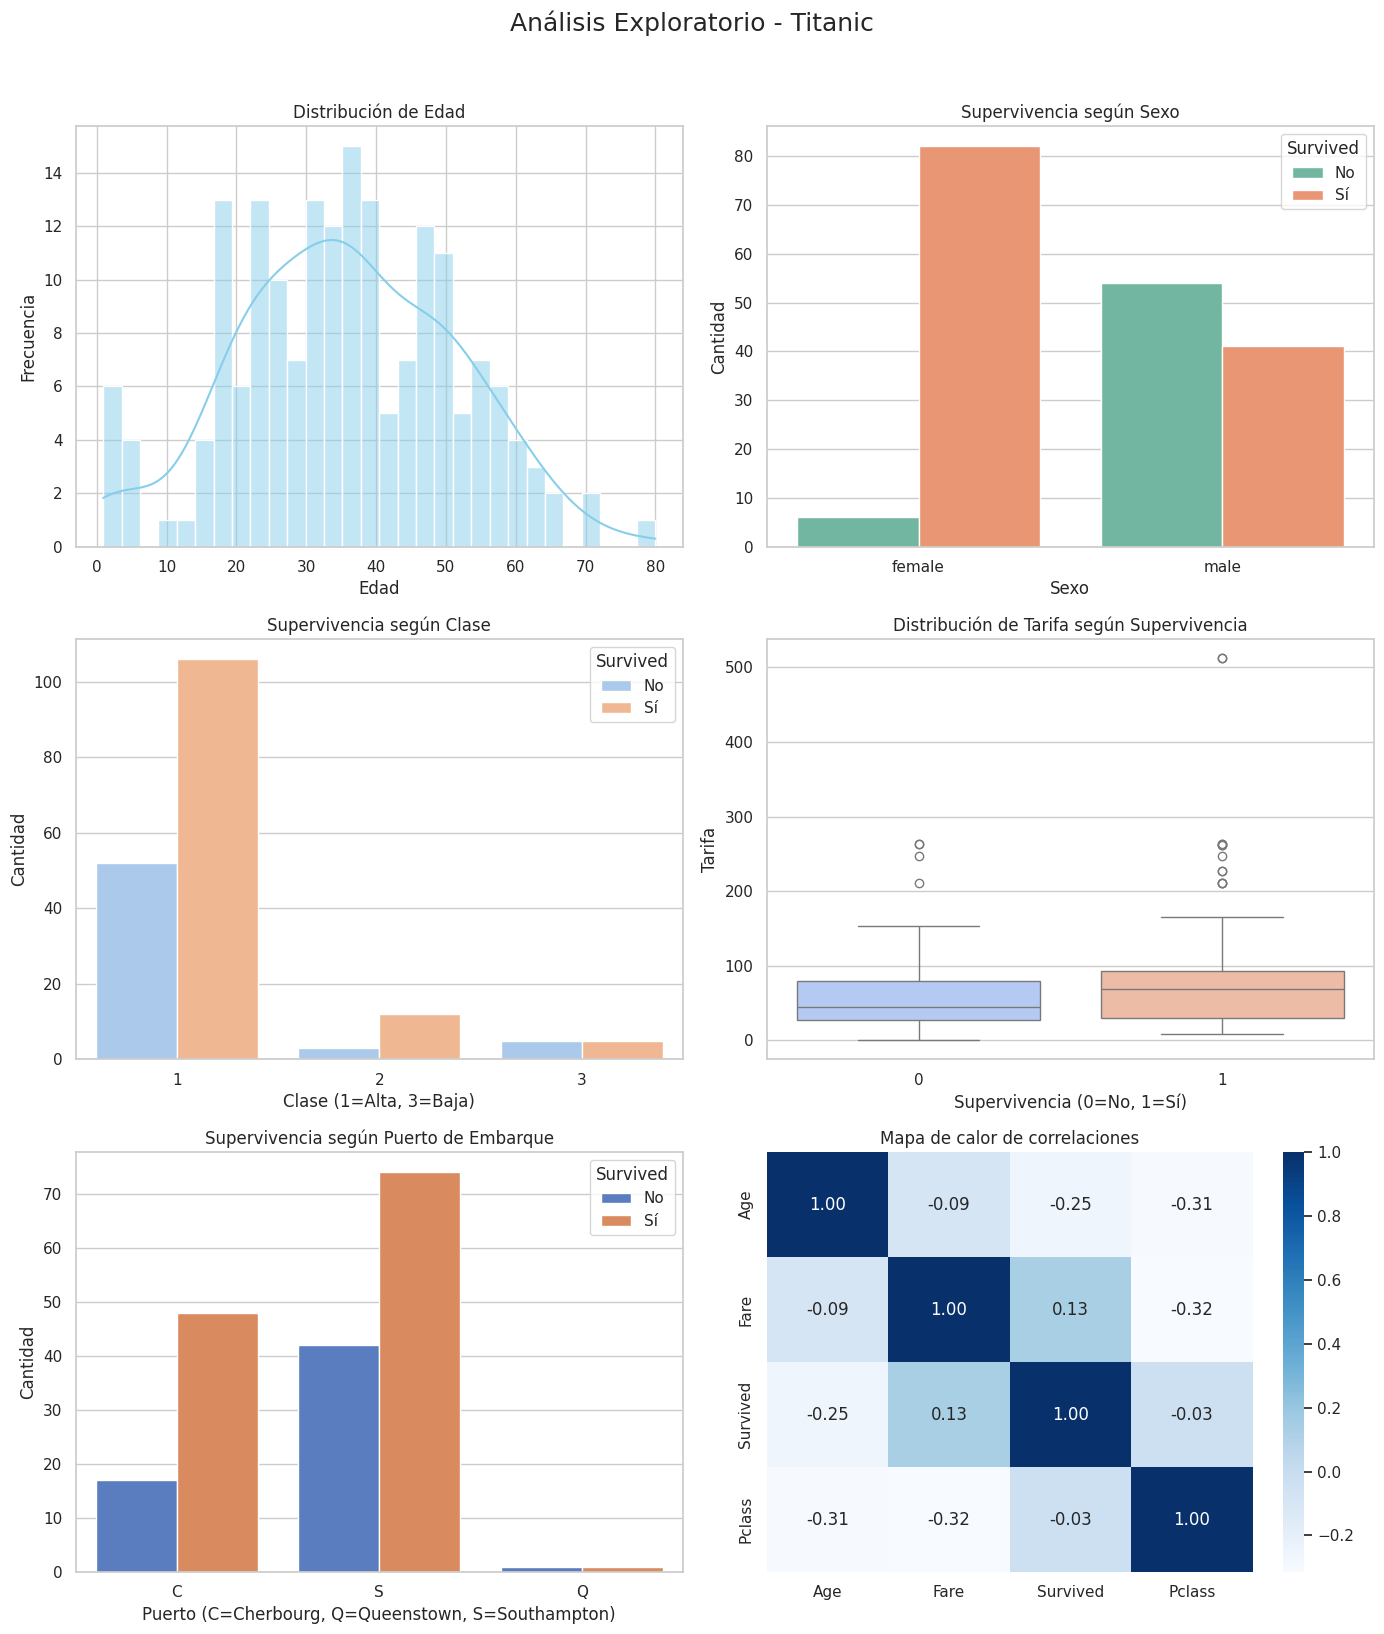

In [11]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(14, 16))  # 3 filas x 2 columnas
fig.suptitle("Análisis Exploratorio - Titanic", fontsize=18, y=1.02)

# 1. Distribución de Edad
sns.histplot(df['Age'].dropna(), bins=30, kde=True, ax=axes[0,0], color="skyblue")
axes[0,0].set_title("Distribución de Edad")
axes[0,0].set_xlabel("Edad")
axes[0,0].set_ylabel("Frecuencia")

# 2. Supervivencia por Sexo
sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[0,1], palette="Set2")
axes[0,1].set_title("Supervivencia según Sexo")
axes[0,1].set_xlabel("Sexo")
axes[0,1].set_ylabel("Cantidad")
axes[0,1].legend(title="Survived", labels=["No", "Sí"])

# 3. Supervivencia por Clase
sns.countplot(x='Pclass', hue='Survived', data=df, ax=axes[1,0], palette="pastel")
axes[1,0].set_title("Supervivencia según Clase")
axes[1,0].set_xlabel("Clase (1=Alta, 3=Baja)")
axes[1,0].set_ylabel("Cantidad")
axes[1,0].legend(title="Survived", labels=["No", "Sí"])

# 4. Tarifa vs Supervivencia
sns.boxplot(x='Survived', y='Fare', data=df, ax=axes[1,1], palette="coolwarm")
axes[1,1].set_title("Distribución de Tarifa según Supervivencia")
axes[1,1].set_xlabel("Supervivencia (0=No, 1=Sí)")
axes[1,1].set_ylabel("Tarifa")

# 5. Supervivencia por Puerto de Embarque
sns.countplot(x='Embarked', hue='Survived', data=df, ax=axes[2,0], palette="muted")
axes[2,0].set_title("Supervivencia según Puerto de Embarque")
axes[2,0].set_xlabel("Puerto (C=Cherbourg, Q=Queenstown, S=Southampton)")
axes[2,0].set_ylabel("Cantidad")
axes[2,0].legend(title="Survived", labels=["No", "Sí"])

# 6. Heatmap de correlaciones
sns.heatmap(df[['Age','Fare','Survived','Pclass']].corr(), annot=True, cmap="Blues", fmt=".2f", ax=axes[2,1])
axes[2,1].set_title("Mapa de calor de correlaciones")

plt.tight_layout()
plt.show()

**A partir de este análisis exploratorio**, se pueden observar varios patrones relevantes. La distribución de la edad muestra una mayor concentración de pasajeros adultos jóvenes entre 20 y 40 años. El análisis de supervivencia revela que las mujeres tuvieron una probabilidad mucho mayor de sobrevivir que los hombres, mientras que la clase también jugó un papel clave: los pasajeros de primera clase tuvieron mayores tasas de supervivencia en comparación con los de segunda y, especialmente, tercera clase. En cuanto a la tarifa, se observa que quienes pagaron más por su boleto (tarifas más altas) tendieron a tener más probabilidades de sobrevivir. Respecto al puerto de embarque, los pasajeros que embarcaron en Cherbourg tuvieron una tasa de supervivencia relativamente mayor que los de Southampton o Queenstown. Finalmente, el mapa de calor de correlaciones confirma estas relaciones: la variable Pclass está negativamente correlacionada con la supervivencia, mientras que la tarifa tiene una correlación positiva moderada, lo que refuerza la idea de que el nivel socioeconómico influyó de manera importante en la probabilidad de sobrevivir.

## Modelo de clasificación

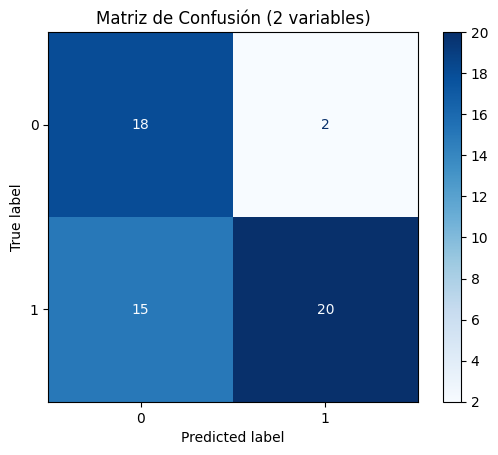

Métricas con 2 variables (Sex + Pclass):
              precision    recall  f1-score   support

           0       0.55      0.90      0.68        20
           1       0.91      0.57      0.70        35

    accuracy                           0.69        55
   macro avg       0.73      0.74      0.69        55
weighted avg       0.78      0.69      0.69        55



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # male=1, female=0 (por defecto)


# 1. Modelo con 2 variables (Sex y Pclass)

X = df[['Sex','Pclass']]
y = df['Survived']

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Matriz de confusión y métricas
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión (2 variables)")
plt.show()

print("Métricas con 2 variables (Sex + Pclass):")
print(classification_report(y_test, y_pred))




Del primer modelo de clasificación con las variables Sexo y Clase, se puede observar un desempeño aceptable con una exactitud del 69%. El modelo logra predecir mejor a los pasajeros que no sobrevivieron (clase 0, recall de 0.90) en comparación con los que sí sobrevivieron (clase 1, recall de 0.57), lo que indica cierto sesgo hacia la predicción de muertes. Esto refleja que el sexo y la clase social fueron variables relevantes para la supervivencia en el Titanic, pero no son suficientes por sí solas para capturar todos los patrones, lo que abre la necesidad de incluir más variables para mejorar la sensibilidad hacia los sobrevivientes.

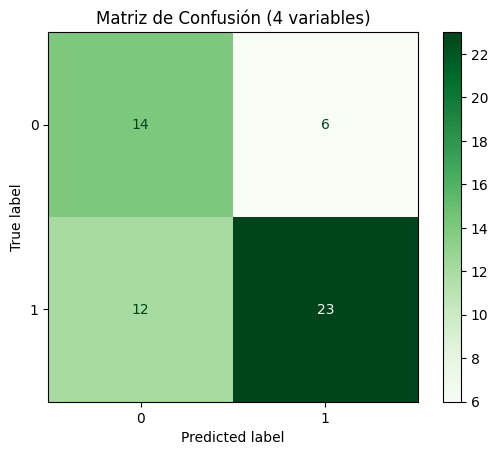

Métricas con más variables (Sex + Pclass + Age + Fare):
              precision    recall  f1-score   support

           0       0.54      0.70      0.61        20
           1       0.79      0.66      0.72        35

    accuracy                           0.67        55
   macro avg       0.67      0.68      0.66        55
weighted avg       0.70      0.67      0.68        55



In [16]:

# 2. Modelo con 4 variables (Sex, Pclass, Age, Fare)

X2 = df[['Sex','Pclass','Age','Fare']]
y = df['Survived']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=42)

#Dado que se encontraron naaN se deben eliminar para poder ejecutar la regresion

X_train2 = X_train2.dropna()
y_train2 = y_train2.loc[X_train2.index]

X_test2 = X_test2.dropna()
y_test2 = y_test2.loc[X_test2.index]

model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test2)

# Matriz de confusión y métricas
cm2 = confusion_matrix(y_test2, y_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=model2.classes_)
disp2.plot(cmap="Greens")
plt.title("Matriz de Confusión (4 variables)")
plt.show()

print("Métricas con más variables (Sex + Pclass + Age + Fare):")
print(classification_report(y_test2, y_pred2))

Del segundo modelo con mas variables, Sexo, Clase, Edad y Tarifa, logra una ligera variacion en el rendimiento general con una exactitud del 67%, frente al 69% del modelo anterior. La precisión y el recall aumentan un poco en la predicción de los pasajeros que sobrevivieron (clase 1), alcanzando un recall de 0.66 (antes 0.57), lo que indica que ahora el modelo es más sensible a la detección de sobrevivientes. Sin embargo, el primero aún predice mejor a los que no sobrevivieron (clase 0). Incluir más variables aporto información útil, aunque el modelo todavía presenta un cierto desbalance para predecir las muertes.

## **3. Segunda parte- Titanic:** Demostración del problema
---

In [15]:
from sklearn.metrics import accuracy_score

# Cargamos los datos ya limpios
# (Ajusta esta parte según tu variable de dataframe)


# Algunas variables relevantes:
X = df[['Sex', 'Pclass', 'Age', 'Fare']]
y = df['Survived']


X = pd.get_dummies(X, drop_first=True)

# Probamos con distintas semillas
random_states = [1, 10, 42, 99, 123]

results = []

for seed in random_states:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # modelo base (Logistic Regression):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Predicciones y accuracy
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results.append({'random_state': seed, 'accuracy': acc})


results_df = pd.DataFrame(results)
print(results_df)


   random_state  accuracy
0             1  0.763636
1            10  0.781818
2            42  0.672727
3            99  0.636364
4           123  0.781818


La precisión oscila entre 0.63 y 0.78, lo que indica una variabilidad moderada.
Esto sugiere que el modelo no es completamente estable y que su rendimiento depende de cómo se dividan los datos. En otras palabras, con diferentes particiones del conjunto de datos, el modelo puede predecir mejor o peor.

## **4. Tercera parte- Titanic:** Implementación de validación cruzada
---

In [18]:

from sklearn.model_selection import KFold, cross_val_score



# Codificar la variable categórica 'Sex'
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# Variables predictoras y objetivo:
X = df[['Sex', 'Pclass']]
y = df['Survived']

# modelo base:
model = LogisticRegression(max_iter=1000)

# K-Fold (por ejemplo: 5 particiones)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# puntuaciones de validación cruzada:
scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Resultados:
print("Puntuaciones por fold:", scores)
print("Promedio de accuracy:", np.mean(scores))
print("Desviación estándar:", np.std(scores))


results = pd.DataFrame({
    'fold': range(1, len(scores)+1),
    'accuracy': scores
})
results


Puntuaciones por fold: [0.75675676 0.64864865 0.59459459 0.80555556 0.72222222]
Promedio de accuracy: 0.7055555555555555
Desviación estándar: 0.0754321837060481


,fold,accuracy
0,1,0.756757
1,2,0.648649
2,3,0.594595
3,4,0.805556
4,5,0.722222


La validación cruzada K-Fold muestra que el modelo tiene un rendimiento promedio de 0.7055 en precisión (accuracy), con una desviación estándar de 0.0754, lo que indica una variabilidad moderada entre los diferentes subconjuntos (folds). Esto significa que el modelo logra predecir correctamente en promedio alrededor del 70 % de los casos, pero su desempeño varía dependiendo del conjunto de datos utilizado para entrenamiento y prueba.  Algunos folds alcanzaron valores altos (como 0.80), mientras que otros bajaron hasta cerca de 0.59, lo que sugiere que el modelo podría estar algo sensible a la partición de los datos

## **5. Cuarta parte- Titanic:** Análisis de resultados
---

In [20]:


display(df_scores)

# Interpretación automática
if std_score < 0.05:
    estabilidad = "alta estabilidad y confianza en el modelo."
elif std_score < 0.1:
    estabilidad = "una estabilidad moderada; el modelo es razonablemente confiable."
else:
    estabilidad = "baja estabilidad; el modelo varía mucho según los datos usados."

print(f"\nInterpretación: El modelo obtiene en promedio una precisión del {mean_score:.2f}, "
      f"con una desviación estándar de {std_score:.2f}, lo que indica {estabilidad}")


,fold,accuracy
0,1,0.756757
1,2,0.648649
2,3,0.594595
3,4,0.805556
4,5,0.722222



Interpretación: El modelo obtiene en promedio una precisión del 0.71, con una desviación estándar de 0.08, lo que indica una estabilidad moderada; el modelo es razonablemente confiable.


# Conclusión

En los modelos aplicados a la base Titanic se evidenciaron varios hallazgos. En la primera parte del modelo de clasificacion, pese a que se incluyeron mas variables estas no mejoraron la exactitud del modelo.

Posteriormente, en la evaluación del modelo con diferentes semillas, la validación cruzada K-Fold y el análisis de su variabilidad, se evidenció cómo la estabilidad y la confianza en el modelo dependian de la forma en que se dividen los datos de entrenamiento y prueba. Se pudo observar que al cambiar la semilla aleatoria, las métricas de precisión variaron moderadamente, demostrando que el modelo es sensible a la composición de los conjuntos de datos. Luego, al aplicar la validación cruzada, se obtuvo una precisión promedio cercana al 70 % con una desviación estándar de aproximadamente 0.07, lo que indica una variabilidad moderada en el rendimiento entre los diferentes subconjuntos.
En conjunto, estos resultados sugieren que el modelo tiene un desempeño aceptable pero aún no totalmente consistente, por lo que podría beneficiarse de la inclusión de más variables relevantes para mejorar su capacidad predictiva.